# Variance Reduction Techniques

$\textbf{Theory from a lecture at LMU by Dr. Ari-Pekka Perkkiö}$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import fima

In [11]:
T = 1
t = 0
x = 1
r = 0.05
sigma = 0.2

In [12]:
M_vanilla = 100000 # number of simulations for vanilla option

M_exotic = 5000 # number of simulations for exotic option
steps_exotic = 1000

### Antithetic Variates

Let $Z \sim N(0,1)$, then $Z$ and $-Z$ are equal in distribution. This means that $Z$ and $-Z$ have the same mean and variance. 

Define $ Y := \frac{1}{2}(G(Z) + G(-Z))$

Then $\mathbb{E}[Y] = \frac{1}{2}(\mathbb{E}[G(Z)] + \mathbb{E}[G(-Z)]) = \mathbb{E}[G(Z)]$

and $\mathbb{V}[Y] = \frac{1}{4}(\mathbb{V}[G(Z)] + \mathbb{V}[G(-Z)] + 2\mathbb{C}[G(Z),G(-Z)]) = \frac{1}{2}\mathbb{V}[G(Z)] + \frac{1}{2}\mathbb{Cov}[G(Z),G(-Z)]$

In [13]:
def mc_antithetic_variates(t, x, eta, payoff, r, sigma, T):
    assets = lambda eta_ : fima.GBMpaths(x, r, sigma, T, eta_)

    payoffs = (payoff(assets(eta)) + payoff(assets(-eta))) / 2

    means = np.exp(-r*(T-t)) * np.cumsum(payoffs) / np.arange(1, len(payoffs) + 1)

    interval_range = 1.96 * np.std(payoffs) / np.sqrt(np.arange(1, len(payoffs) + 1))

    return means, interval_range

In [14]:
eta = np.random.normal(size = (1, M_vanilla))

In [15]:
K = 1.2

true_price = fima.BS_put_price(t, x, K, r, sigma, T)
basic_means, basic_interval_range = fima.basic_mc(t, x, eta, lambda x : fima.european_put_payoff(x, K), r, sigma, T)
antithetic_means, antithetic_interval_range = mc_antithetic_variates(t, x, eta, lambda x : fima.european_put_payoff(x, K), r, sigma, T)

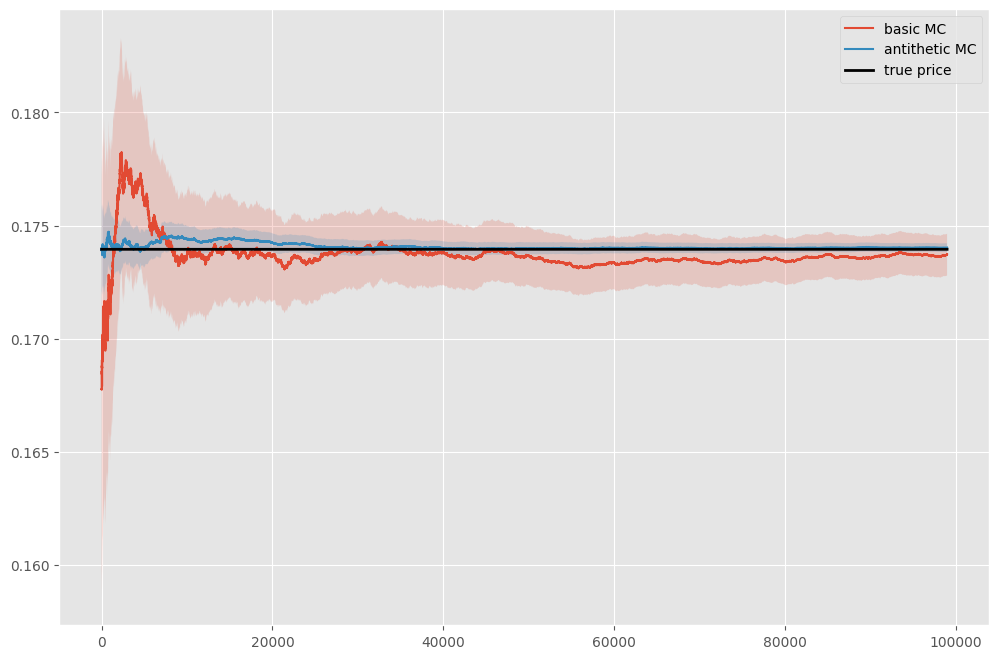

In [16]:
fima.plot_mc(basic_means, basic_interval_range, 'basic MC')
fima.plot_mc(antithetic_means, antithetic_interval_range, 'antithetic MC')
fima.plot_true_price(true_price, M_vanilla)
plt.legend();

In [17]:
K = 0.8

true_price = fima.BS_put_price(t, x, K, r, sigma, T)
basic_means, basic_interval_range = fima.basic_mc(t, x, eta, lambda x : fima.european_put_payoff(x, K), r, sigma, T)
antithetic_means, antithetic_interval_range = mc_antithetic_variates(t, x, eta, lambda x : fima.european_put_payoff(x, K), r, sigma, T)

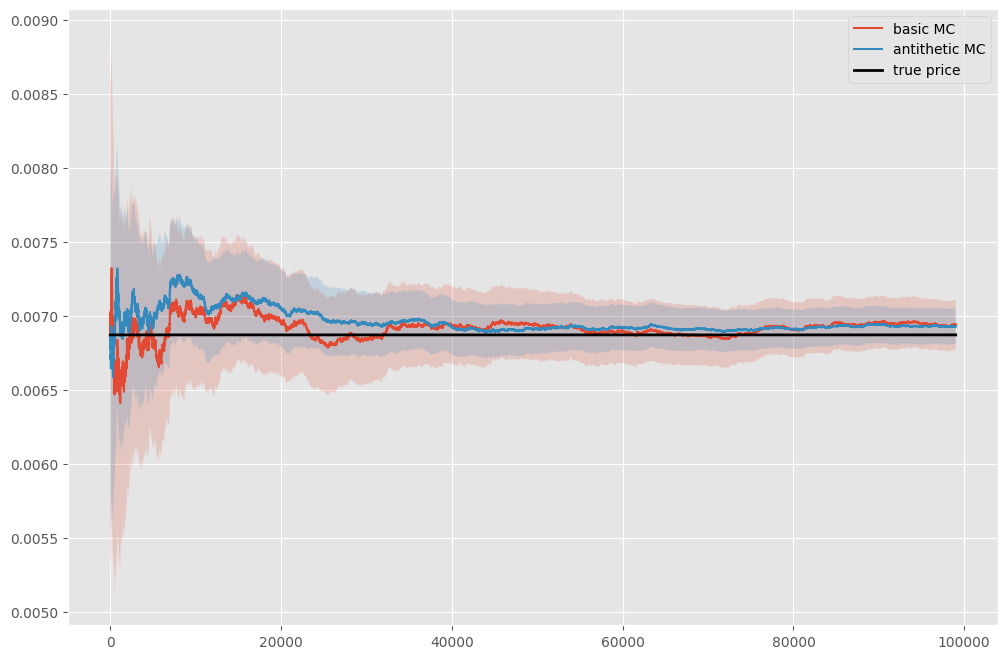

In [18]:
fima.plot_mc(basic_means, basic_interval_range, 'basic MC')
fima.plot_mc(antithetic_means, antithetic_interval_range, 'antithetic MC')
fima.plot_true_price(true_price, M_vanilla)
plt.legend();

This seems very effective for OTM options and is very easy to implement.
Note that is also about twice as expensive computationally as the original method, so for ITM options it is not worth it in this example.